In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:

df = pd.read_csv(r'https://raw.githubusercontent.com/shail0808/Time-Series-Model-Selection/main/prodchem.csv',index_col=0, parse_dates=[0])
df.shape, df.head()

((926, 4),
           Job Start Date  Scrape Sale Qty.  Rate in Rs./Kg.  Amount in Rs.
 Sr.                                                                       
 1    2018-11-10 00:00:00             149.0             13.5         2011.5
 2    2018-11-02 00:00:00             230.0             18.0         4140.0
 3    2018-11-13 00:00:00             325.0             17.0         5525.0
 4    2018-11-21 00:00:00             350.0             17.0         5950.0
 5    2018-08-29 00:00:00             250.0             11.0         2750.0)

In [57]:
df=df.rename(columns={'Job Start Date':'Date', 'Scrape Sale Qty.':'Production(in Liters)','Rate in Rs./Kg.':'Rate/unit','Amount in Rs.':'Revenue(in Lac)'})
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Production(in Liters),Rate/unit,Revenue(in Lac)
Sr.,,,,
1,2018-11-10,149.0,13.5,2011.5
2,2018-11-02,230.0,18.0,4140.0
3,2018-11-13,325.0,17.0,5525.0
4,2018-11-21,350.0,17.0,5950.0
5,2018-08-29,250.0,11.0,2750.0


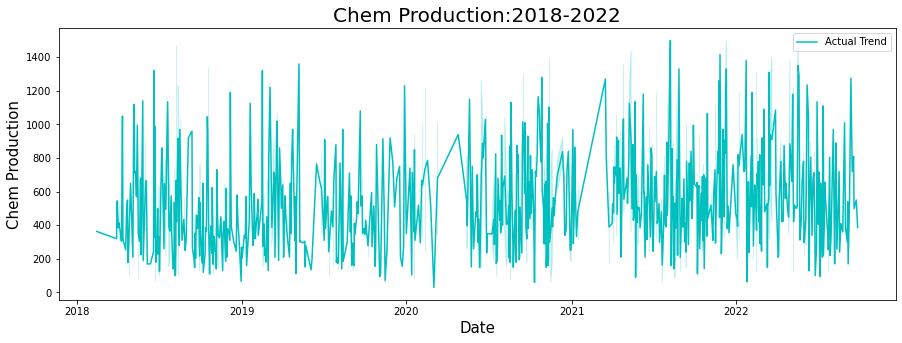

In [93]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Production(in Liters)', data=df, legend=True, color='c', label='Actual Trend')
plt.ylabel('Chem Production', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Chem Production:2018-2022', fontsize=20);

### Forecasting using Moving Average :


In [60]:
df['mv_avg'] = df['Production(in Liters)'].rolling(window=30).mean().shift(1)
df.head()

,Date,Production(in Liters),Rate/unit,Revenue(in Lac),mv_avg
Sr.,,,,,
1,2018-11-10,149.0,13.5,2011.5,NaN
2,2018-11-02,230.0,18.0,4140.0,NaN
3,2018-11-13,325.0,17.0,5525.0,NaN
4,2018-11-21,350.0,17.0,5950.0,NaN
5,2018-08-29,250.0,11.0,2750.0,NaN


In [61]:
pd.set_option('display.float_format', lambda x:'%.2f' % x )
#df[['Rate in Rs./Kg.', 'mv_avg']][15:20]

Text(0, 0.5, 'Steel Rate')

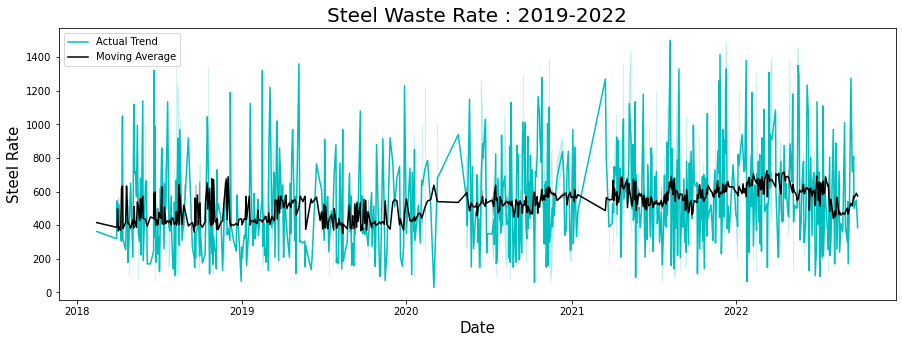

In [63]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['Date'][30:], y=df['Production(in Liters)'][30:],data=df, color='c', label='Actual Trend')
sns.lineplot(x=df['Date'][30:], y=df['mv_avg'][30:],data=df, color='black', label='Moving Average')

plt.title('Steel Waste Rate : 2019-2022', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Steel Rate', fontsize=15)
#plt.legend();

Mean absolute Percentage Error (MAPE):


In [65]:
# defining a function

def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100,2)
    

In [66]:
get_mape(df['Production(in Liters)'][30:].values, df['mv_avg'][30:].values)   #considering only previous 15 days to predict

77.84

### Root Mean Square Error

In [67]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df['Production(in Liters)'][30:].values, df['mv_avg'][30:].values))

312.65924135179955

In this case, RMSC is 1357.9 which means our predicted values are 1.35k standard deviation away from actual mean 

### Weightage Average 

In [68]:
def weightage_avg(data, weight):
    return sum([data[i]*weight[i] for i in range(len(data))]/sum(weight))

# Exponential Smoothing (Alfa smoothing constant) 

In [ ]:
# using ewm() funciton to get exponential smoothing

In [71]:
df['ewm'] = df['Production(in Liters)'].ewm(alpha=0.3).mean()

In [72]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [88]:
get_mape(df['Production(in Liters)'][15:].values, df['ewm'][15:].values)

56.65

In [89]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df['Production(in Liters)'][30:].values, df['ewm'][30:].values))

231.39789036304433

Text(0, 0.5, 'Steel Rate')

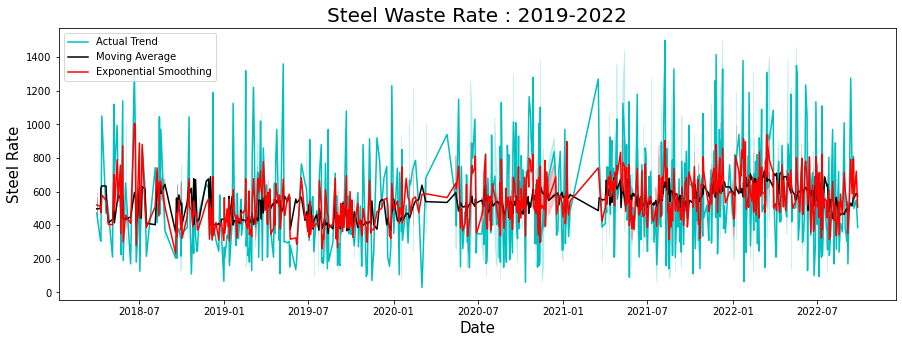

In [92]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['Date'][100:], y=df['Production(in Liters)'][100:],data=df, color='c', label='Actual Trend')
sns.lineplot(x=df['Date'][100:], y=df['mv_avg'][100:],data=df, color='black', label='Moving Average')
sns.lineplot(x=df['Date'][100:], y=df['ewm'][100:],data=df, color='red', label='Exponential Smoothing')
plt.title('Steel Waste Rate : 2019-2022', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Steel Rate', fontsize=15)


### Decomposing Time-Series Data
- Additive Models ( y = Trend + Seasonality + Cyclical Component + Irregual Component)
- Multiplicative Models ( y = Trend x Seasonality x Cyclical Component x Irregular Component)


### Additive Models 
- Additive Models ( y = Trend + Seasonality + Cyclical Component + Irregual Component)


C:\Users\shail\AppData\Local\Temp/ipykernel_22148/56105461.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  tsad_decompose = seasonal_decompose(np.array(df['Production(in Liters)']), model = 'additive', freq = 15)


<Figure size 1080x360 with 0 Axes>

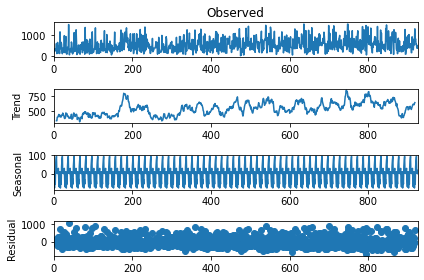

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
tsad_decompose = seasonal_decompose(np.array(df['Production(in Liters)']), model = 'additive', freq = 15)
plt.figure(figsize = (15,5))
tsad_plot = tsad_decompose.plot()

### Multiplicative Models 
- Multiplicative Models ( y = Trend x Seasonality x Cyclical Component x Irregular Component)


In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
tsm_decompose = seasonal_decompose(np.array(df['Production(in Liters)']), model = 'multiplicative', freq = 12)

C:\Users\shail\AppData\Local\Temp/ipykernel_22148/1478381188.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  tsm_decompose = seasonal_decompose(np.array(df['Production(in Liters)']), model = 'multiplicative', freq = 12)


<Figure size 1080x360 with 0 Axes>

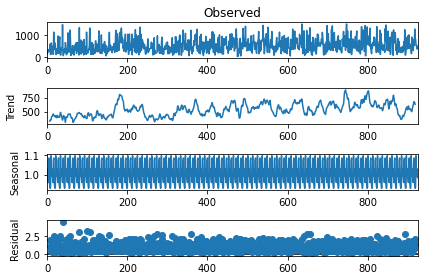

In [79]:
plt.figure(figsize = (15,5))
tsm_plot = tsm_decompose.plot()

In [80]:
df['seasonal'] = tsm_decompose.seasonal
df['trend'] = tsm_decompose.trend

In [81]:
df[30:35]

,Date,Production(in Liters),Rate/unit,Revenue(in Lac),mv_avg,ewm,seasonal,trend
Sr.,,,,,,,,
31,2018-11-07,730.00,17.00,12410.00,376.73,507.38,0.94,397.17
32,2018-09-05,920.00,16.50,15180.00,396.10,631.17,0.93,401.96
33,2018-08-04,146.00,11.00,1606.00,419.10,485.61,0.94,462.79
34,2018-08-07,100.00,11.52,1152.00,413.13,369.93,1.10,485.75
35,2018-08-09,110.00,11.52,1267.20,404.80,291.95,0.99,451.62


c:\Users\shail\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trend', ylabel='Density'>

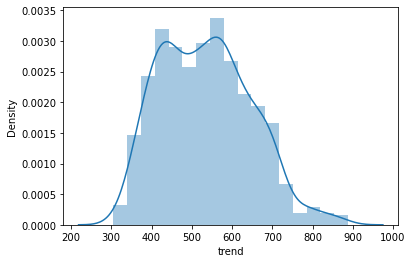

In [82]:
sns.distplot(df.trend)

In [83]:
df.to_excel('Prod_forecast.xlsx')

### Finding Auto Correlation and Partial Auto-correlation

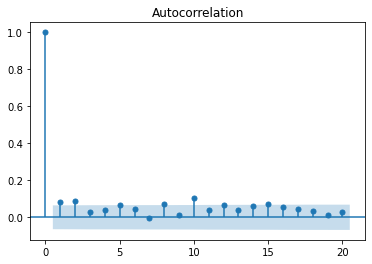

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(df['Production(in Liters)'], lags=20)

### Observation : 
- Shaded region shows upper bounday and lower bound where Null-Hypothesis cannot be rejected. Hence only it can be rejected at lag-1
- Hence ACF is significant at lag-1 only

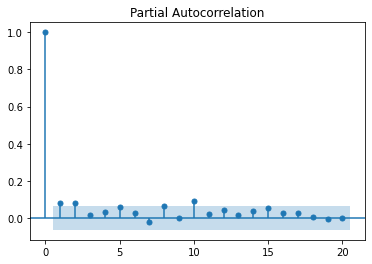

In [85]:
pacf_plot = plot_pacf(df['Production(in Liters)'], lags=20)

In [86]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(df['Production(in Liters)'][0:800].astype(np.float64), order=(1,0,0))
ar_model = arima.fit()

c:\Users\shail\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\shail\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [87]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                               
=================================================================================
Dep. Variable:     Production(in Liters)   No. Observations:                  800
Model:                        ARMA(1, 0)   Log Likelihood               -5728.302
Method:                          css-mle   S.D. of innovations            311.511
Date:                   Mon, 26 Dec 2022   AIC                          11462.603
Time:                           15:54:28   BIC                          11476.657
Sample:                                0   HQIC                         11468.002
                                                                                 
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         524.1623     12.031     43.567      0.000     500.581     547.743
ar.L1.Production(in Liters)     0.0847      0.035      2.392      0.017       0.015       0.154
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           11.8071           +0.0000j           11.8071            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
forecast_45_52 = ar_model.predict(800,900)

In [ ]:
get_mape(df['Rate in Rs./Kg.'][880:], forecast_45_52)

33.5

### Stationarity Check